# Digit recognizer. Part 3. Neural Network.

# Loading packages and data.

In [1]:
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt, matplotlib.image as mpimg
%matplotlib inline
import keras
import keras
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from numpy.random import seed

C:\Users\pozir\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("C:/Users/pozir/OneDrive/Documentos/XDigit_Recognizer/train.csv")
df_test = pd.read_csv("C:/Users/pozir/OneDrive/Documentos/XDigit_Recognizer/test.csv")

## Creating arrays for the features and the response variable and dividing them into train and hold out sets.


In [3]:
X=df_train.iloc[5000:55000,1:]
y=df_train.iloc[5000:55000,:1]

### Making the images true black and white to simplify the task

In [4]:
X[X>0]=1


In [51]:
X_test=df_test.iloc[:,:]

In [ ]:
X = (X.iloc[:,:].values).astype('float32')

y=(y.iloc[:,0].values).astype('int32')

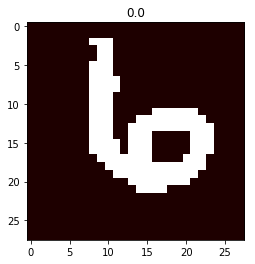

In [11]:
i=9
img=X[i]
img=img.reshape((28,28))
plt.imshow(img,cmap='pink')
plt.title(X[i,0])

(array([647.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

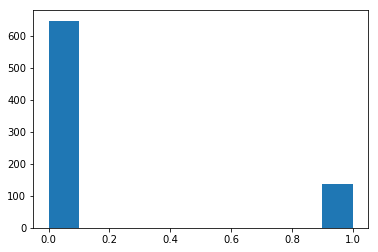

In [13]:
plt.hist(X[i])

In [14]:
y = to_categorical(y)

### Specifying, compiling and fitting a model

In [15]:
# Save the number of columns in predictors: n_cols
n_cols = X.shape[1] # that´s how many nodes there will be in the input layer
# Set up the model
model = Sequential() # Sequential model requires that each layer has weight/connection only to the one layer coming after it.

# Add the first layer
model.add(Dense(1000, activation='relu', input_shape=(n_cols,))) # adding 1st layer (with 100000 nodes). It is called "dense"
                                                                   # because all the nodes in in the previous layer connect
                                                                   # to all the nodes in the current layer                                                                 # current layer

# Add the output layer
model.add(Dense(10, activation='softmax')) # adding last/output layer with only 10 nodes as that´s how many output nodes we have.

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

model.fit(X, y)

Epoch 1/1
37000/37000 [==============================] - 15s 404us/step - loss: 0.6207 - acc: 0.8435


In [16]:
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 784)
output shape  (None, 10)


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


### Changing optimization parameters

In [32]:
# A function that creates model

def get_new_model(input_shape=(n_cols,)):
    model = Sequential() 
    model.add(Dense(1000, activation='relu', input_shape=(n_cols,)))                                                              
    model.add(Dense(1000, activation='relu')) 
    model.add(Dense(10, activation='softmax'))
    return(model)

In [36]:
# Create list of learning rates: lr_to_test
lr_to_test = [.5, 0.01, 0.1, .01]
# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model(input_shape=n_cols)
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
  
    # Fit the model
    model.fit(X, y)




Testing model with learning rate: 0.500000

Epoch 1/1
37000/37000 [==============================] - 34s 911us/step - loss: 14.3218


Testing model with learning rate: 0.010000

Epoch 1/1
37000/37000 [==============================] - 35s 936us/step - loss: 0.5782


Testing model with learning rate: 0.100000

Epoch 1/1
37000/37000 [==============================] - 35s 938us/step - loss: 0.2900


Testing model with learning rate: 0.010000

Epoch 1/1
37000/37000 [==============================] - 35s 938us/step - loss: 0.5732


 The best result seems to be with the learning rate 0.010000

### Validation in deep learning & Early stopping: Optimizing the optimization

- Deep learning is widely used on large datasets

- Therefore validation split rather than cross-validation

- Single validation score based on a large ammount of data is realible enough

- We can use early stopping to stop optimization when it isn't helping any more. 
  Since the optimization stops automatically when it isn't helping, we can also set a high value for epochs in our call to .fit()

## Base model

In [37]:
# Fit the model
model = Sequential() # Sequential model requires that each layer has weight/connection only to the one layer coming after it.

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))                                                           

# Add the output layer
model.add(Dense(10, activation='softmax')) # adding last/output layer with only 10 nodes as that´s how many output nodes we have.

# Specify the optimizer
lr=.01
my_optimizer = SGD(lr=lr)

# Compile the model
model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping & tell to stop optimization when the validation loss hasn't improved for 2 epochs by specifying the patience

early_stopping_monitor = EarlyStopping(patience=2)

# Fitting the model

model.fit(X, y,validation_split=0.3, epochs=30,
callbacks=[early_stopping_monitor])

Train on 25900 samples, validate on 11100 samples
Epoch 1/30
25900/25900 [==============================] - 3s 100us/step - loss: 0.9297 - acc: 0.7483 - val_loss: 0.4990 - val_acc: 0.8669
Epoch 2/30
25900/25900 [==============================] - 2s 71us/step - loss: 0.4373 - acc: 0.8769 - val_loss: 0.3879 - val_acc: 0.8891
Epoch 3/30
25900/25900 [==============================] - 2s 93us/step - loss: 0.3685 - acc: 0.8946 - val_loss: 0.3430 - val_acc: 0.9023
Epoch 4/30
25900/25900 [==============================] - 2s 73us/step - loss: 0.3349 - acc: 0.9020 - val_loss: 0.3291 - val_acc: 0.9030
Epoch 5/30
25900/25900 [==============================] - 2s 76us/step - loss: 0.3126 - acc: 0.9086 - val_loss: 0.3003 - val_acc: 0.9109
Epoch 6/30
25900/25900 [==============================] - 2s 79us/step - loss: 0.2950 - acc: 0.9135 - val_loss: 0.2900 - val_acc: 0.9140
Epoch 7/30
25900/25900 [==============================] - 2s 74us/step - loss: 0.2794 - acc: 0.9188 - val_loss: 0.2740 - val_ac

In [38]:
max(model.history.history['val_acc'])

0.9511711711711712

In [44]:
seed(1)
# Fit the model
model_1 = Sequential() # Sequential model requires that each layer has weight/connection only to the one layer coming after it.

# Add the first layer
model_1.add(Dense(1000, activation='relu', input_shape=(n_cols,)))                                                           
model_1.add(Dense(1000, activation='relu'))  

# Add the output layer
model_1.add(Dense(10, activation='softmax')) # adding last/output layer with only 10 nodes as that´s how many output nodes we have.

# Specify the optimizer
lr=.01
my_optimizer = SGD(lr=lr)

# Compile the model
model_1.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping & tell to stop optimization when the validation loss hasn't improved for 2 epochs by specifying the patience

early_stopping_monitor = EarlyStopping(patience=2)

# Fitting the model

model_1.fit(X, y,validation_split=0.3, epochs=30,
callbacks=[early_stopping_monitor])

Train on 25900 samples, validate on 11100 samples
Epoch 1/30
25900/25900 [==============================] - 28s 1ms/step - loss: 0.6845 - acc: 0.8287 - val_loss: 0.3601 - val_acc: 0.9011
Epoch 2/30
25900/25900 [==============================] - 25s 976us/step - loss: 0.3281 - acc: 0.9046 - val_loss: 0.2993 - val_acc: 0.9156
Epoch 3/30
25900/25900 [==============================] - 26s 1ms/step - loss: 0.2731 - acc: 0.9179 - val_loss: 0.2613 - val_acc: 0.9219
Epoch 4/30
25900/25900 [==============================] - 25s 984us/step - loss: 0.2383 - acc: 0.9291 - val_loss: 0.2249 - val_acc: 0.9326
Epoch 5/30
25900/25900 [==============================] - 27s 1ms/step - loss: 0.2120 - acc: 0.9377 - val_loss: 0.2082 - val_acc: 0.9366
Epoch 6/30
25900/25900 [==============================] - 25s 971us/step - loss: 0.1901 - acc: 0.9444 - val_loss: 0.1944 - val_acc: 0.9414
Epoch 7/30
25900/25900 [==============================] - 27s 1ms/step - loss: 0.1723 - acc: 0.9492 - val_loss: 0.1804 - v

In [45]:
max(model_1.history.history['val_acc'])

0.968018018018018

## Comparing the two models

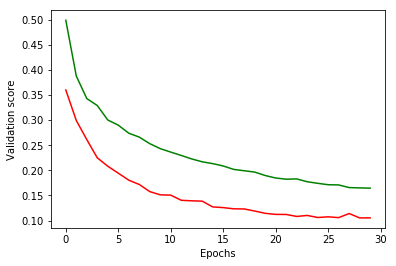

In [46]:
plt.plot(model.history.history['val_loss'], 'g' , model_1.history.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


## Predicting and saving the results

In [52]:
predictions = model_1.predict_classes(X_test)



In [53]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [54]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})


In [55]:
submissions.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [57]:
submissions.to_csv("Neu_Net_333.csv", index=False, header=True)

This submission scored 0.96357